We'll be working with the fandango_scores.csv file, which can be downloaded from the FiveThirtEight Github repo. Here are the columns we'll be working with in this mission:

FILM - film name
RT_user_norm - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
Metacritic_user_nom - average user rating from Metacritic, normalized to a 1 to 5 point scale
IMDB_norm - average user rating from IMDB, normalized to a 1 to 5 point scale
Fandango_Ratingvalue - average user rating from Fandango, normalized to a 1 to 5 point scale
Fandango_Stars - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)
Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The Fandango_Ratingvalue column reflects the true average rating while the Fandango_Stars column reflects the displayed, rounded rating.

Let's read in this dataset, which allows us to compare how a movie fared across all 4 review sites.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

reviews = pd.read_csv(r'C:\Users\CLEMO\\UserReviews\fandango_scores.csv')
reviews.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
norm_reviews = reviews[['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]
                     
print(norm_reviews[:1])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0  


Next we will generate bar plots in order to create context on which is movie has the highest user reviews.


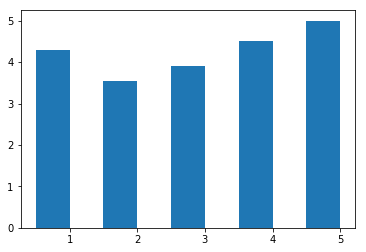

In [3]:
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75

fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)

plt.show()

By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from 0 to 6). We only need tick labels on the x-axis where the bars are positioned. We can use Axes.set_xticks() to change the positions of the ticks to [1, 2, 3, 4, 5]:

We will create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.

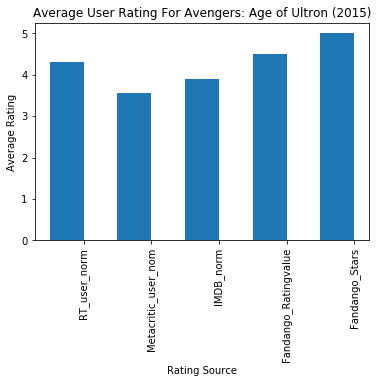

In [4]:
#We will create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values

bar_positions = arange(5) + 0.75

tick_positions = range(1,6)
#We will create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax
fig, ax = plt.subplots()
#Generate a bar plot with left set to bar_positions height set to bar_heights width set to 0.5.
ax.bar(bar_positions, bar_heights, 0.5)

ax.set_xticks(tick_positions)

ax.set_xticklabels(num_cols, rotation=90)
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")


plt.show()


In [5]:
norm_reviews[num_cols].iloc[0].values

array([4.3 , 3.55, 3.9 , 4.5 , 5.  ])

We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using Axes.bar(), we use Axes.barh(). This method has 2 required parameters, bottom and width. We use the bottom parameter to specify the y coordinate for the bottom sides for the bars and the width parameter to specify the lengths of the bars:

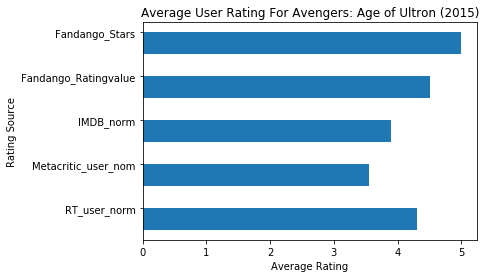

In [6]:
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()

ax.barh(bar_positions, bar_widths, 0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")

ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

### Scatter Plot.
A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

To generate a scatter plot, we use Axes.scatter(). The scatter() method has 2 required parameters, x and y, which matches the parameters of the plot() method.

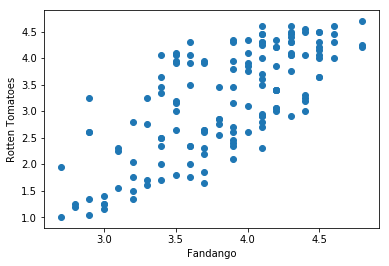

In [7]:
fig, ax = plt.subplots()
x_axis = norm_reviews['Fandango_Ratingvalue']
y_axis = norm_reviews['RT_user_norm']

ax.scatter(x_axis, y_axis)
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")

plt.show()

We will now use scatter plots to determine the correlation between Fandango and Rotten Tomatoes.

The second scatter plot is a mirror reflection of the first scatter plot. The nature of the correlation is still reflected, however, which is the important thing.

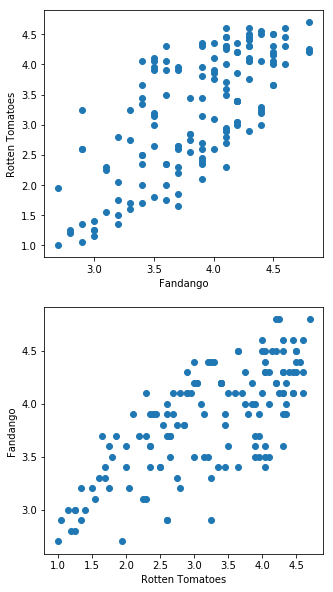

In [8]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2.scatter(norm_reviews["RT_user_norm"], norm_reviews["Fandango_Ratingvalue"])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")

plt.show()

In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use Axes.set_xlim() and Axes.set_ylim() to set the data limits for both axes:

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

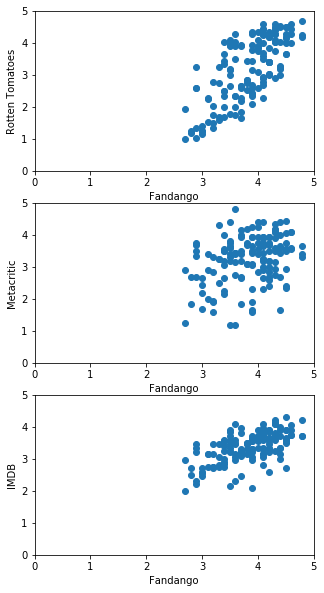

In [9]:
 import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["Metacritic_user_nom"])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["IMDB_norm"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()

In [10]:
fandango_distribution = reviews['Fandango_Ratingvalue'].value_counts().sort_index()

imdb_distribution = reviews['IMDB_norm'].value_counts().sort_index()

print("Fandango Distribution")
print(fandango_distribution)

print(imdb_distribution)

Fandango Distribution
2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


We can use the distributions above to create a histogram which help us visualize continuous values using bins while bar plots help us visualize discrete values.

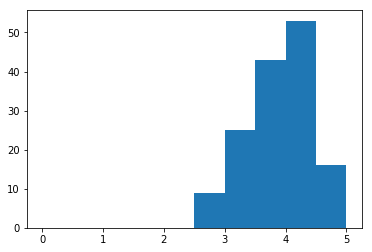

In [11]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range = (0,5))
plt.show()

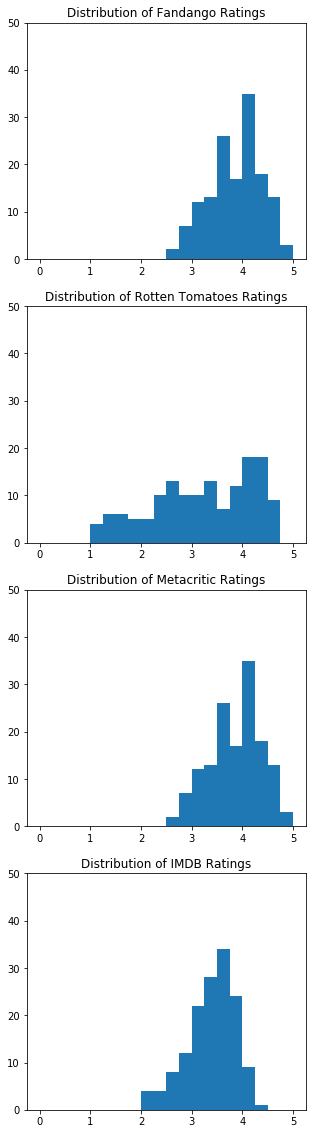

In [12]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title("Distribution of Fandango Ratings")
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0, 5))
ax2.set_title("Distribution of Rotten Tomatoes Ratings")
ax2.set_ylim(0, 50)


ax3.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax3.set_title("Distribution of Metacritic Ratings")
ax3.set_ylim(0, 50)


ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0, 5))
ax4.set_title("Distribution of IMDB Ratings")
ax4.set_ylim(0, 50)

plt.show()

The histogram gives us adequate insight on the distribution of ratings across all the review sites, but to get an accurate percentage we'll nedd to segragate the data into quartiles. That's done using box plots.

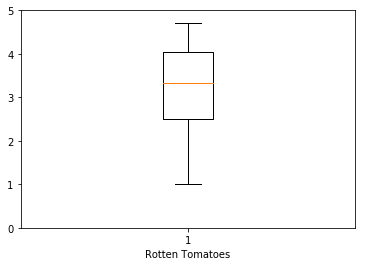

In [13]:
fig, ax = plt.subplots()

ax.boxplot(norm_reviews['RT_user_norm'])

ax.set_ylim(0,5)
ax.set_xlabel('Rotten Tomatoes')

plt.show()

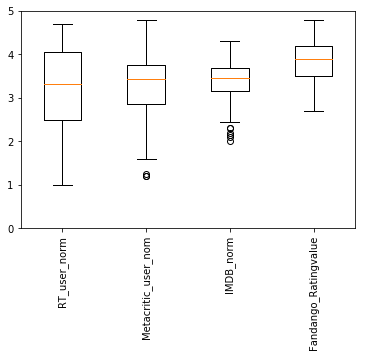

In [14]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)

plt.show()

From the boxplot, we can reach the following conclusions:

user ratings from Rotten Tomatoes and Metacritic span a larger range of values
user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values
In addition, you may have noticed there are a couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called outliers or extreme values. Outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.

In this mission, we learned how to use histograms and box plots to visualize and compare the distributions of the ratings from the four movie review sites. Next in this course is a guided project, where we'll explore how to use pandas with matplotlib effectively and create more complex plots.